In [1]:
from nile.api.v1 import (
    clusters,
    aggregators as na,
    filters as nf,
    extractors as ne,
    Record
)

import json
from qb2.api.v1 import filters as sf, extractors as se

import datetime
import pandas as pd
import re

In [2]:
cluster = clusters.Hahn().env(
    templates=dict(
        # date='{2017-01-16..2017-01-22}'
        date='{2017-12-18..2017-12-18}'
    )
)

In [6]:
def extract(records):
    for record in records:
        if record.type != '2':
            continue
        url = record.url
        try:
            parsed = json.loads(record.data)
        except:
            continue
            
        if parsed is None:
            continue 
            
        for event in parsed:
            if (event is not None) and ('type' in event) and (event['type'] == 'event'):
#                 yield Record(event = event, url = url)
                try:
                    data_parsed = json.loads(event['data'])
                except:
                    data_parsed = {}
                    
                stamp = ''
                if (event is not None) and ('stamp' in event):
                    stamp = event['stamp']
                    
                event_type = ''
                if (data_parsed is not None) and ('type' in data_parsed):
                    event_type = data_parsed['type']
                
                yield Record(
                    event = event, 
                    data_parsed = data_parsed, 
                    event_type = event_type,
                    url = record.url,
                    uniqid = record.uniqid,
                    counterid = record.counterid,
                    hit = record.hit,
                    requestid = record.requestid,
                    part = record.part,
                    unixtime = record.unixtime,
                    stamp = stamp
                )


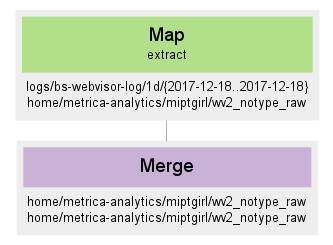

In [7]:
job = cluster.job()

log =  job.table('logs/bs-webvisor-log/1d/@date').map(extract)\
    .put('home/metrica-analytics/miptgirl/wv2_notype_raw')
    
job.commands_graph

In [ ]:
job.run()

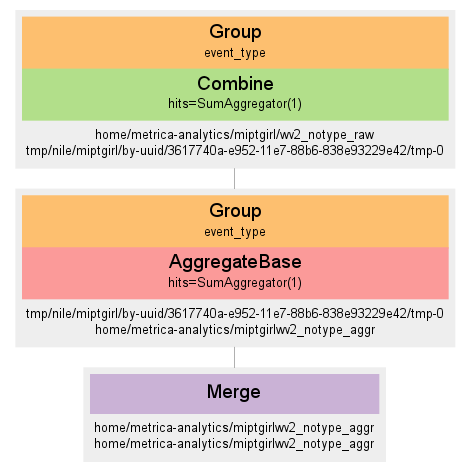

In [ ]:
job = cluster.job()

log = job.table('home/metrica-analytics/miptgirl/wv2_notype_raw')\
    .groupby('event_type').aggregate(hits = na.count())\
    .put('home/metrica-analytics/miptgirlwv2_notype_aggr')
    
    
job.commands_graph

In [ ]:
job.run()

In [13]:
cluster.read('home/metrica-analytics/miptgirlwv2_notype_aggr').as_dataframe()

,event_type,hits
0,,844244
1,blur,195975362
2,change,780990856
3,click,46933336
4,deviceRotation,383
5,eof,15729621
6,focus,201847008
7,keystroke,11783873
8,mousedown,50054127
9,mousemove,1404432333


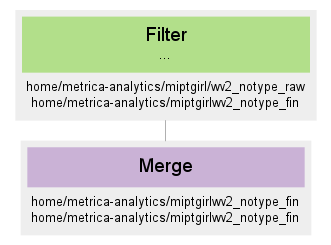

In [14]:
job = cluster.job()

log = job.table('home/metrica-analytics/miptgirl/wv2_notype_raw')\
    .filter(nf.custom(lambda x: x == '', 'event_type'))\
    .put('home/metrica-analytics/miptgirlwv2_notype_fin')
    
job.commands_graph

In [15]:
job.run()